<a href="https://colab.research.google.com/github/shajarian/Transformer/blob/main/Copy_of_Copy_of_Copy_of_ConceptExplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon May  1 01:25:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import re

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
data_location = "/content/drive/My Drive/DL with Shirley/data/"
#data_location = "/Users/barnessgroupncsu-cei_15/My Drive/DL with Shirley/data/"

Mounted at /content/drive/


In [ ]:
questions_df = pd.read_csv(data_location + "Questions.csv",encoding='ISO-8859-1')
questions_df.drop(columns = ["CreationDate", "OwnerUserId", "ClosedDate"],inplace = True)
questions_df

,Id,Score,Title,Body
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...
1264211,40143210,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [ ]:
# filter out questions with score less than 20
min_score = 10
np.shape(questions_df[questions_df['Score']>min_score])

(32604, 4)

In [ ]:
# drop questions that have score less than 50
questions_df = questions_df[questions_df['Score']>min_score]
questions_df

,Id,Score,Title,Body
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...
1256569,39963870,11,Is using Single as an Assert a bad practice?,<p>I'm testing a method that manipulates a col...
1257356,39981800,11,How to achieve test isolation with Symfony for...,<p><strong><em>Note:</strong> This is Symfony ...
1261242,40073530,16,Why doesn't ${@:-1} return the last element of...,<p><em>I thought to post up a Q&amp;A on this ...
1262332,40098470,19,If multiple classes have a static variable in ...,<p>I have the following example code:</p>\n\n<...


In [ ]:
tags_df = pd.read_csv(data_location + "Tags.csv")
tags_df['Tag'] = tags_df['Tag'].astype(str) # Converting "Tag" values into string to make actions like appending easier
tags_df

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


In [ ]:
# Counting the number of unique tags
len(tags_df.Tag.unique())

37035

In [ ]:
top_tags_number = 30
top_tags = tags_df['Tag'].value_counts().head(top_tags_number).index.tolist()
top_tags

['javascript',
 'java',
 'c#',
 'php',
 'android',
 'jquery',
 'python',
 'html',
 'c++',
 'ios',
 'mysql',
 'css',
 'sql',
 'asp.net',
 'objective-c',
 'ruby-on-rails',
 '.net',
 'c',
 'iphone',
 'angularjs',
 'arrays',
 'sql-server',
 'json',
 'ruby',
 'r',
 'ajax',
 'regex',
 'xml',
 'node.js',
 'asp.net-mvc']

In [ ]:
tags_df = tags_df[tags_df['Tag'].isin(top_tags)]
tags_df

,Id,Tag
7,120,sql
8,120,asp.net
14,260,c#
15,260,.net
18,330,c++
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


In [ ]:
grouped_tags_df = tags_df.groupby('Id')['Tag'].apply(list).reset_index(name = "Tags")
grouped_tags_df

,Id,Tags
0,120,"[sql, asp.net]"
1,260,"[c#, .net]"
2,330,[c++]
3,470,[.net]
4,580,[sql-server]
...,...,...
911491,40143150,[javascript]
911492,40143190,[python]
911493,40143210,[php]
911494,40143340,[android]


In [ ]:
# v = 99.85
# p = np.percentile(tag_counts, v)
# print(v, " percentile of arr : ", p)
# print(np.count_nonzero(tag_counts >= p))

Based on the graph, the threshold for cutting the data can be at around count of 18,000 which equals percentile 99.95 and leaves only 20 labels in our dataset. Since we want a higher number of labels, we will consider top-50 labels in tags dataset and remove the rest. This will help students find the most relevant categories or teachers categories the assignments in the meaningful groups.

In [ ]:
def preprocess_text(text):
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});|\n', '', text)   # remove HTML tags
    text = re.sub(r'[^\w\s]','', text)  # remove punctuation marks
    Tidy_body = text.lower()
    return Tidy_body

questions_df['Tidy_body'] = questions_df['Body'].apply(preprocess_text)
questions_df.reset_index(inplace=True,drop=True)
questions_df

<ipython-input-12-c7d2e26a38fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df['Tidy_body'] = questions_df['Body'].apply(preprocess_text)


,Id,Score,Title,Body,Tidy_body
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,ive written a database generation script in sq...
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,are there any really good tutorials explaining...
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,has anyone got experience creating sqlbased as...
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,this is something ive pseudosolved many times ...
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,i have a little game written in c it uses a da...
...,...,...,...,...,...
32599,39963870,11,Is using Single as an Assert a bad practice?,<p>I'm testing a method that manipulates a col...,im testing a method that manipulates a collect...
32600,39981800,11,How to achieve test isolation with Symfony for...,<p><strong><em>Note:</strong> This is Symfony ...,note this is symfony 26 but i believe the sam...
32601,40073530,16,Why doesn't ${@:-1} return the last element of...,<p><em>I thought to post up a Q&amp;A on this ...,i thought to post up a qa on this as i did not...
32602,40098470,19,If multiple classes have a static variable in ...,<p>I have the following example code:</p>\n\n<...,i have the following example codeclass a p...


In [ ]:
questions_df.Tidy_body[0]

'ive written a database generation script in sql and want to execute it in my adobe air applicationcreate table trole       roleid integer primary key      rolename varchar40create table tfile     fileid integer primary key    filename varchar50    filedescription varchar500    thumbnailid integer    fileformatid integer    categoryid integer    isfavorite boolean    dateadded date    globalaccesscount integer    lastaccesstime date    downloadcomplete boolean    isnew boolean    isspotlight boolean    duration varchar30create table tcategory     categoryid integer primary key    categoryname varchar50    parent_categoryid integeri execute this in adobe air using the following methodspublic static function runsqlfromfilefilenamestringvoid     var filefile  fileapplicationdirectoryresolvepathfilename    var streamfilestream  new filestream    streamopenfile filemoderead    var strsqlstring  streamreadutfbytesstreambytesavailable    nonquerystrsqlpublic static function nonquerystrsqlstri

In [ ]:
questions_df = questions_df.merge(grouped_tags_df, on='Id')

In [ ]:
questions_df

,Id,Score,Title,Body,Tidy_body,Tags
0,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,has anyone got experience creating sqlbased as...,"[sql, asp.net]"
1,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,i have a little game written in c it uses a da...,"[c#, .net]"
2,330,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,i am working on a collection of classes used f...,[c++]
3,470,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,ive been writing a few web services for a net ...,[.net]
4,580,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,i wonder how you guys manage deployment of a d...,[sql-server]
...,...,...,...,...,...,...
23765,39925460,12,How can I filter columns (rather than rows) in...,<p>Filtering rows in a particular column are e...,filtering rows in a particular column are easy...,[c#]
23766,39963870,11,Is using Single as an Assert a bad practice?,<p>I'm testing a method that manipulates a col...,im testing a method that manipulates a collect...,[c#]
23767,39981800,11,How to achieve test isolation with Symfony for...,<p><strong><em>Note:</strong> This is Symfony ...,note this is symfony 26 but i believe the sam...,[php]
23768,40098470,19,If multiple classes have a static variable in ...,<p>I have the following example code:</p>\n\n<...,i have the following example codeclass a p...,[c++]


In [ ]:
questions_df.Tags[0]

['sql', 'asp.net']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(questions_df.Tags)

In [ ]:
mlb.classes_
# mlb.inverse_transform(questions_df.Tag_Array[0].reshape(1,-1))

array(['.net', 'ajax', 'android', 'angularjs', 'arrays', 'asp.net',
       'asp.net-mvc', 'c', 'c#', 'c++', 'css', 'html', 'ios', 'iphone',
       'java', 'javascript', 'jquery', 'json', 'mysql', 'node.js',
       'objective-c', 'php', 'python', 'r', 'regex', 'ruby',
       'ruby-on-rails', 'sql', 'sql-server', 'xml'], dtype=object)

In [ ]:
questions_df['Binarized_Tags'] = list(tag_matrix)
questions_df

,Id,Score,Title,Body,Tidy_body,Tags,Binarized_Tags
0,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,has anyone got experience creating sqlbased as...,"[sql, asp.net]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,i have a little game written in c it uses a da...,"[c#, .net]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,330,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,i am working on a collection of classes used f...,[c++],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,470,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,ive been writing a few web services for a net ...,[.net],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,580,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,i wonder how you guys manage deployment of a d...,[sql-server],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
23765,39925460,12,How can I filter columns (rather than rows) in...,<p>Filtering rows in a particular column are e...,filtering rows in a particular column are easy...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
23766,39963870,11,Is using Single as an Assert a bad practice?,<p>I'm testing a method that manipulates a col...,im testing a method that manipulates a collect...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
23767,39981800,11,How to achieve test isolation with Symfony for...,<p><strong><em>Note:</strong> This is Symfony ...,note this is symfony 26 but i believe the sam...,[php],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
23768,40098470,19,If multiple classes have a static variable in ...,<p>I have the following example code:</p>\n\n<...,i have the following example codeclass a p...,[c++],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


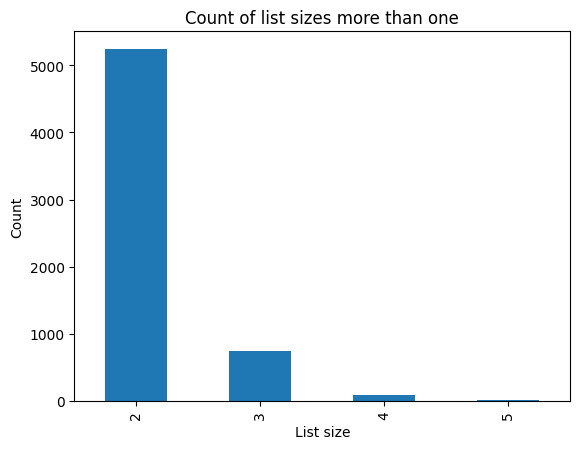

In [ ]:
import matplotlib.pyplot as plt

# create example dataframe
df = questions_df

# filter rows with list of more than one element
df_filtered = df[df['Tags'].apply(lambda x: len(x) > 1)]

# plot count of sizes more than one
sizes = df_filtered['Tags'].apply(len)
sizes_counts = sizes.value_counts()
sizes_counts.plot(kind='bar')
plt.xlabel('List size')
plt.ylabel('Count')
plt.title('Count of list sizes more than one')
plt.show()

In [ ]:
questions_df.drop(columns = ["Id", "Score", "Title","Body"],inplace = True)
questions_df

,Tidy_body,Tags,Binarized_Tags
0,has anyone got experience creating sqlbased as...,"[sql, asp.net]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i have a little game written in c it uses a da...,"[c#, .net]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,i am working on a collection of classes used f...,[c++],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,ive been writing a few web services for a net ...,[.net],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,i wonder how you guys manage deployment of a d...,[sql-server],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
23765,filtering rows in a particular column are easy...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
23766,im testing a method that manipulates a collect...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
23767,note this is symfony 26 but i believe the sam...,[php],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
23768,i have the following example codeclass a p...,[c++],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


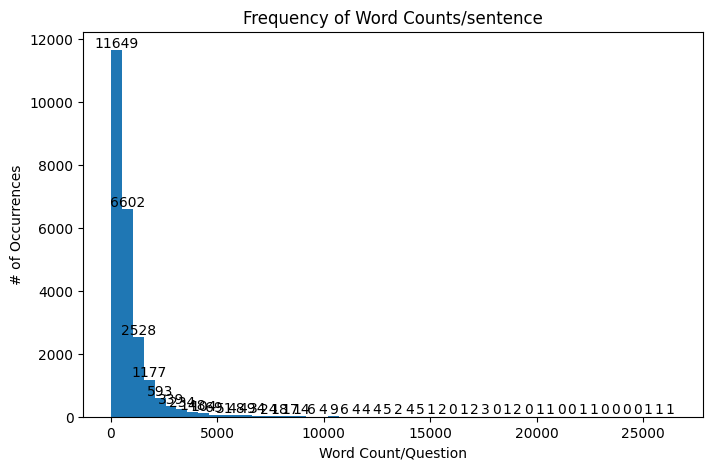

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# compute no. of words in each question
questions = questions_df.Tidy_body
word_cnt = [len(quest) for quest in questions]

# Plot the distribution
plt.figure(figsize=[8,5])
n, bins, patches = plt.hist(word_cnt, bins = 4 * 13) # the highest number of tokens in a question is 13368--so we choose the n*13 as the no. of bins to the bin range
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurrences')
plt.title("Frequency of Word Counts/sentence")

# Add count values to top of each bar
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, int(n[i]), ha='center', va='bottom')

plt.show()

In [ ]:
# from wordcloud import WordCloud
# tag_to_count_map
# tupl = dict(tag_to_count_map.items())
# word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tupl)
# plt.figure(figsize = (12,8))
# plt.imshow(word_cloud)
# plt.axis('off')
# plt.tight_layout(pad=0)

In [ ]:
# hyperparameters
MAX_LEN = 512
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 2
LEARNING_RATE = 1e-05

In [ ]:
# Import tokenizer
!pip install transformers
from transformers import BertTokenizer, BertModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We use BERT-base and as in our context the upper case is not important, we use uncased
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Loading BERT tokenizer...


In [ ]:
#[CLS], [PAD], [SEP] are special tokens
# We have 3D, input ids, token type ids (when we have separate sentences) and attention mask(padding!?)
# This is just an example of tokenizer
#101 is CLS, "this" in the index of 2023, 102 is SEP


# example_text = "this is my final project of deep learning class"
# encodings = tokenizer.encode_plus(example_text, add_special_tokens=True, max_length=MAX_LEN, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='pt')
# encodings

Based on this plot, it can be seen that the maximum number of 500 tokens encompass most of questions.

In [ ]:
# RANDOM_SEED = 2023

# from sklearn.model_selection import train_test_split
# # First Split for Train and Test
# x_train,x_test,y_train,y_test = train_test_split(questions_df['Tokens'], questions_df['Binarized_Tags'] , test_size=0.2, random_state=RANDOM_SEED,shuffle=True)
# # Next split Train in to training and validation
# x_tr,x_val,y_tr,y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=RANDOM_SEED,shuffle=True)

In [ ]:
# encodings = tokenizer.encode_plus(text, add_special_tokens=True, max_length=MAX_LEN, padding="max_length", truncation=True, return_attention_mask=True, return_tensors="pt")  # tokenize the text

In [ ]:
questions_df["Binarized_Tags"]

0        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
23765    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
23766    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
23767    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
23768    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
23769    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
Name: Binarized_Tags, Length: 23770, dtype: object

In [ ]:
#Preprocess data for Bert and prepare DataLoader
import torch
torch.cuda.empty_cache()

class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.title = self.df['Tidy_body']
        self.targets = np.array(self.df["Binarized_Tags"].to_list())
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index): #get item with index
        title = str(self.title[index])
        title = " ".join(title.split())
        # Tokenize input using encode
        # this None is for compare sentences similarity. In our context it should be equal to None.
        # I'm using tokenizer.encode_plus to get the fifth item (attention masks)
        #Now we're ready to perform the real tokenization.

# The tokenizer.encode_plus function combines multiple steps for us:

# Split the sentence into tokens.
# Add the special [CLS] and [SEP] tokens.
# Map the tokens to their IDs.
# Pad or truncate all sentences to the same length.
# Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.
        inputs = self.tokenizer.encode_plus(title,None, add_special_tokens=True,max_length=self.max_len,padding='max_length',return_token_type_ids=True,truncation=True,
                                            return_attention_mask=True,return_tensors='pt'
        )
        # "inputs" is a dictionary, which we unfold and return in the next step.
        return {
            'input_ids': inputs['input_ids'].flatten(), # flattening is needed for training procedure because it can convert our input dimension
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]) #convert to float tensor for train
        }

In [ ]:
np.array(questions_df["Binarized_Tags"].to_list())

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Training & Validation Split
# Divide up our training set to use 80% for training and 20% for validation and test.
train_size = 0.8

train_df = questions_df.sample(frac=train_size, random_state=200).reset_index(drop=True)
remaining_df = questions_df.drop(train_df.index).reset_index(drop=True)
val_df = remaining_df.sample(frac=0.5, random_state=200).reset_index(drop=True)
test_df = remaining_df.drop(val_df.index).reset_index(drop=True)

In [ ]:
len(train_df) ,len(val_df), len(test_df)

(19016, 2377, 2377)

In [ ]:
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [ ]:
a=next(iter(train_data_loader))
a['input_ids'].shape

torch.Size([8, 512])

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
# Defining model and train
import torch.nn as nn
# constructor we just initialize our super class
class BERTClass(nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)# we have two outputs here, a sequence output which is an output(tensor) for every word. Another is pooler output which has only one output for one sentence
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, top_tags_number) # 768 is the size of the hidden layer representations in the transformer network (feedforward-networks) ##########

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output) #this is a pooler output
        output = self.linear(output_dropout)
        return output

model = BERTClass()
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
# Define loss function using logits loss (combination of Binary Cross Entropy)
def loss_fn(outputs, targets):
    return nn.BCEWithLogitsLoss()(outputs, targets)
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
epochs = EPOCHS

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_data_loader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
val_targets=[]
val_outputs=[]

In [ ]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs targets
# def flat_accuracy(preds, targets):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     targets_flat = targets.flatten()
#     return np.sum(pred_flat == targets_flat) / len(targets_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
# training loop
# Set the seed value all over the place to make this reproducible.
import random
import numpy as np

seed_val = 2023
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# This is a function called train_model that trains a deep learning model using a training loop. The function takes in several arguments including the number of epochs (n_epochs), training and validation data loaders (training_loader and validation_loader), the model architecture (model), optimizer (optimizer), and file paths for checkpointing (checkpoint_path and best_model_path).

# The function starts by initializing a variable valid_loss_min with a very large value (infinity) to track the minimum validation loss. Then, the function loops through each epoch, where for each epoch, it loops through each batch of data in the training data loader and performs the forward and backward passes to update the model's parameters.
# After the training loop for each epoch is completed, the function loops through each batch of data in the validation data loader and calculates the validation loss, which is used to monitor the model's performance.

# def train_model(n_epochs, training_loader, validation_loader, model,
#                 optimizer, checkpoint_path, best_model_path): #file paths for checkpointing

  # initialize tracker with the maximum positive value to track the minimum validation loss

  #valid_loss_min = np.Inf


for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    #initially train and validation loss are zero.
    # Measure how long the training epoch takes.
    t0 = time.time()
    train_loss = 0
    valid_loss = 0
    model.train() # tell the model that we are in training mode

    for index, batch in enumerate(train_data_loader): # each batch cointains 32 examples corresponding input ids, attention, token
      # Progress update every 40 batches.
      if index % 40 == 0 and not index == 0:
        elapsed = format_time(time.time() - t0)
         # Report progress.
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(index, len(train_data_loader), elapsed))

        input_ids = batch['input_ids'].to(device, dtype = torch.long)
        attention_mask = batch['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
        targets = batch['targets'].to(device, dtype = torch.float)
        outputs = model(input_ids, attention_mask, token_type_ids)
        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        optimizer.zero_grad()
        loss.backward() #calculate gradients
        # Gradient cliping: This is a technique to prevent "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step() # update rules (how parameters would be modified based on gradients, learning rate and so on)
        scheduler.step() #update the learning rate
        train_loss = train_loss + ((1 / (index + 1)) * (loss.item() - train_loss))
        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  training loss: {0:.2f}".format(train_loss))
        print("  Training epcoh took: {:}".format(training_time))


# Validation loop
    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval() # we are doing evaluation now!

    with torch.no_grad():
      for index, batch in enumerate(val_data_loader): # each batch cointains 32 examples corresponding input ids, attention, token
        input_ids = batch['input_ids'].to(device, dtype = torch.long)
        attention_mask = batch['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
        targets = batch['targets'].to(device, dtype = torch.float)
        outputs = model(input_ids, attention_mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        val_loss = valid_loss + ((1 / (index + 1)) * (loss.item() - valid_loss))

    #     # Move logits and labels to CPU
    #     logits = logits.detach().cpu().numpy()
    #     label_ids = b_labels.to('cpu').numpy()

    #     # Calculate the accuracy for this batch of test sentences, and
    #     # accumulate it over all batches.
    #     total_eval_accuracy += flat_accuracy(logits, label_ids)


    # # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_accuracy / len(val_data_loader)
    # print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # # Calculate the average loss over all of the batches.
    # avg_val_loss = total_eval_loss / len(val_data_loader)

    #      # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(val_loss))
    print("  Validation took: {:}".format(validation_time))

      # create checkpoint variable and add important data
      #For each epoch, the function creates a dictionary called checkpoint that contains the epoch number, current validation loss, model's state dictionary, and optimizer's state dictionary.
      #The checkpoint dictionary is used for saving the model's state at certain intervals (called checkpointing), which allows for resuming training from a specific epoch and avoiding loss of progress due to interruptions.
       # Record all statistics from this epoch.

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': train_loss,
            'Valid. Loss': val_loss,
            #'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


   # The function also has commented out code that saves the checkpoint and best model if the validation loss decreases.
   # This is a common technique called early stopping, which stops training the model when the validation loss stops improving to avoid overfitting. However, in the current implementation, this code is commented out and not used.

    #   ## TODO: save the model if validation loss has decreased
    #   if valid_loss <= valid_loss_min:
    #     print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
    #     # save checkpoint as best model
    #     save_ckp(checkpoint, True, checkpoint_path, best_model_path)
    #     valid_loss_min = valid_loss

    # print('############# Epoch {}  Done   #############\n'.format(epoch))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of  2,377.    Elapsed: 0:00:02.

  training loss: 0.02
  Training epcoh took: 0:00:07
  Batch    80  of  2,377.    Elapsed: 0:00:11.

  training loss: 0.02
  Training epcoh took: 0:00:12
  Batch   120  of  2,377.    Elapsed: 0:00:14.

  training loss: 0.03
  Training epcoh took: 0:00:15
  Batch   160  of  2,377.    Elapsed: 0:00:18.

  training loss: 0.03
  Training epcoh took: 0:00:18
  Batch   200  of  2,377.    Elapsed: 0:00:21.

  training loss: 0.04
  Training epcoh took: 0:00:22
  Batch   240  of  2,377.    Elapsed: 0:00:24.

  training loss: 0.04
  Training epcoh took: 0:00:25
  Batch   280  of  2,377.    Elapsed: 0:00:26.

  training loss: 0.04
  Training epcoh took: 0:00:27
  Batch   320  of  2,377.    Elapsed: 0:00:28.

  training loss: 0.04
  Training epcoh took: 0:00:28
  Batch   360  of  2,377.    Elapsed: 0:00:29.

  training loss: 0.04
  Training epcoh took: 0:00:30
  Batch   400  of  2,377.    Elapsed: 0:00:31.



In [ ]:
# # training loop
# # Set the seed value all over the place to make this reproducible.
# import random
# import numpy as np
# from sklearn import metrics
# from tqdm import tqdm, trange

# seed_val = 2023
# random.seed(seed_val)
# np.random.seed(seed_val)
# torch.manual_seed(seed_val)
# torch.cuda.manual_seed_all(seed_val)

# # We'll store a number of quantities such as training and validation loss,
# # validation accuracy, and timings.
# training_stats = []

# # Measure the total training time for the whole run.
# total_t0 = time.time()

# # This is a function called train_model that trains a deep learning model using a training loop. The function takes in several arguments including the number of epochs (n_epochs), training and validation data loaders (training_loader and validation_loader), the model architecture (model), optimizer (optimizer), and file paths for checkpointing (checkpoint_path and best_model_path).

# # The function starts by initializing a variable valid_loss_min with a very large value (infinity) to track the minimum validation loss. Then, the function loops through each epoch, where for each epoch, it loops through each batch of data in the training data loader and performs the forward and backward passes to update the model's parameters.
# # After the training loop for each epoch is completed, the function loops through each batch of data in the validation data loader and calculates the validation loss, which is used to monitor the model's performance.

# # def train_model(n_epochs, training_loader, validation_loader, model,
# #                 optimizer, checkpoint_path, best_model_path): #file paths for checkpointing

#   # initialize tracker with the maximum positive value to track the minimum validation loss

#   #valid_loss_min = np.Inf

# tr_loss = 0.0
# tr_step = 0.0
# for epoch_i in range(0, epochs):
#     print("")
#     print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
#     print('Training...')
#     #initially train and validation loss are zero.
#     # Measure how long the training epoch takes.
#     t0 = time.time()

#     model.train() # tell the model that we are in training mode

#     for index, batch in enumerate(train_data_loader): # each batch cointains 32 examples corresponding input ids, attention, token
#       # Progress update every 40 batches.
#       if index % 40 == 0 and not index == 0:
#         elapsed = format_time(time.time() - t0)
#          # Report progress.
#         print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(index, len(train_data_loader), elapsed))

#         input_ids = batch['input_ids'].to(device, dtype = torch.long)
#         attention_mask = batch['attention_mask'].to(device, dtype = torch.long)
#         token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
#         targets = batch['targets'].to(device, dtype = torch.float)
#         outputs = model(input_ids, attention_mask, token_type_ids)
#         optimizer.zero_grad()
#         loss = loss_fn(outputs, targets)
#         optimizer.zero_grad()
#         loss.backward() #calculate gradients
#         # Gradient cliping: This is a technique to prevent "exploding gradients" problem.
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#         optimizer.step() # update rules (how parameters would be modified based on gradients, learning rate and so on)
#         scheduler.step() #update the learning rate
#         tr_loss += loss.item()
#         tr_step += 1
#         # Measure how long this epoch took.
#         training_time = format_time(time.time() - t0)

#         print("")
#         print("  training loss: {0:.2f}".format(tr_loss))
#         print("  Training epcoh took: {:}".format(training_time))


# # Validation loop
#     print("")
#     print("Running Validation...")
#     t0 = time.time()
#     model.eval() # we are doing evaluation now!
#     preds=[]
#     label_ids=[]
#     with torch.no_grad():
#       for index, batch in enumerate(val_data_loader): # each batch cointains 32 examples corresponding input ids, attention, token
#         input_ids = batch['input_ids'].to(device, dtype = torch.long)
#         attention_mask = batch['attention_mask'].to(device, dtype = torch.long)
#         token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
#         targets = batch['targets'].to(device, dtype = torch.float)
#         outputs = model(input_ids, attention_mask, token_type_ids)

#         preds.extend(torch.sigmoid(outputs).detach().cpu().numpy().tolist())
#         label_ids.extend(targets.detach().cpu().numpy().tolist())

#         preds_out = np.array(preds)>=0.5


#     #     # Move logits and labels to CPU
#     #     logits = logits.detach().cpu().numpy()
#     #     label_ids = b_labels.to('cpu').numpy()

#     #     # Calculate the accuracy for this batch of test sentences, and
#     #     # accumulate it over all batches.
#     #     total_eval_accuracy += flat_accuracy(logits, label_ids)


#     # # Report the final accuracy for this validation run.
#     # avg_val_accuracy = total_eval_accuracy / len(val_data_loader)
#     # print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

#     # # Calculate the average loss over all of the batches.
#     # avg_val_loss = total_eval_loss / len(val_data_loader)

#     #      # Measure how long the validation run took.
#     validation_time = format_time(time.time() - t0)

#     # print("  Validation Loss: {0:.2f}".format(val_loss))
#     # print("  Validation took: {:}".format(validation_time))

#       # create checkpoint variable and add important data
#       #For each epoch, the function creates a dictionary called checkpoint that contains the epoch number, current validation loss, model's state dictionary, and optimizer's state dictionary.
#       #The checkpoint dictionary is used for saving the model's state at certain intervals (called checkpointing), which allows for resuming training from a specific epoch and avoiding loss of progress due to interruptions.
#        # Record all statistics from this epoch.

#     training_stats.append(
#         {
#             'epoch': epoch_i + 1,
#             'Training Loss': tr_loss,
#             #'Valid. Loss': val_loss,
#             #'Valid. Accur.': avg_val_accuracy,
#             'Training Time': training_time,
#             'Validation Time': validation_time
#         }
#     )

# # The line of code you have provided calculates the accuracy score of the predicted labels (preds_out) compared to the true labels (label_ids) using scikit-learn's accuracy_score function from the metrics module.

# #The accuracy_score function takes two parameters: the true labels and the predicted labels, in that order. It then returns the accuracy score, which is the proportion of correct predictions out of all predictions made.

# #So, the variable accuracy will contain the accuracy score of the model's predictions on the given dataset. This is a commonly used evaluation metric for classification tasks.
#     accuracy = metrics.accuracy_score(label_ids, preds_out)
#     F1_score_micro = metrics.f1_score(label_ids,preds_out, average='micro',zero_division=0)
#     F1_score_macro = metrics.f1_score(label_ids,preds_out, average='macro',zero_division=0)



#     print(f'tain_loss={tr_loss/tr_step}')
#     print(f'Accuracy={accuracy}')
#     print(f'F1_Score_Micro={F1_score_micro}')
#     print(f'F1_Score_Macro={F1_score_macro}')


# print("Training complete!")

# print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


#    # The function also has commented out code that saves the checkpoint and best model if the validation loss decreases.
#    # This is a common technique called early stopping, which stops training the model when the validation loss stops improving to avoid overfitting. However, in the current implementation, this code is commented out and not used.

#     #   ## TODO: save the model if validation loss has decreased
#     #   if valid_loss <= valid_loss_min:
#     #     print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
#     #     # save checkpoint as best model
#     #     save_ckp(checkpoint, True, checkpoint_path, best_model_path)
#     #     valid_loss_min = valid_loss

#     # print('############# Epoch {}  Done   #############\n'.format(epoch))

Using word embeddings for converting tags to numeric values is not possible, since many tags are technical words without any numeric representation.

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,0.07,1.33e-03,0:02:09,0:01:20
2,0.04,1.05e-03,0:01:55,0:01:23


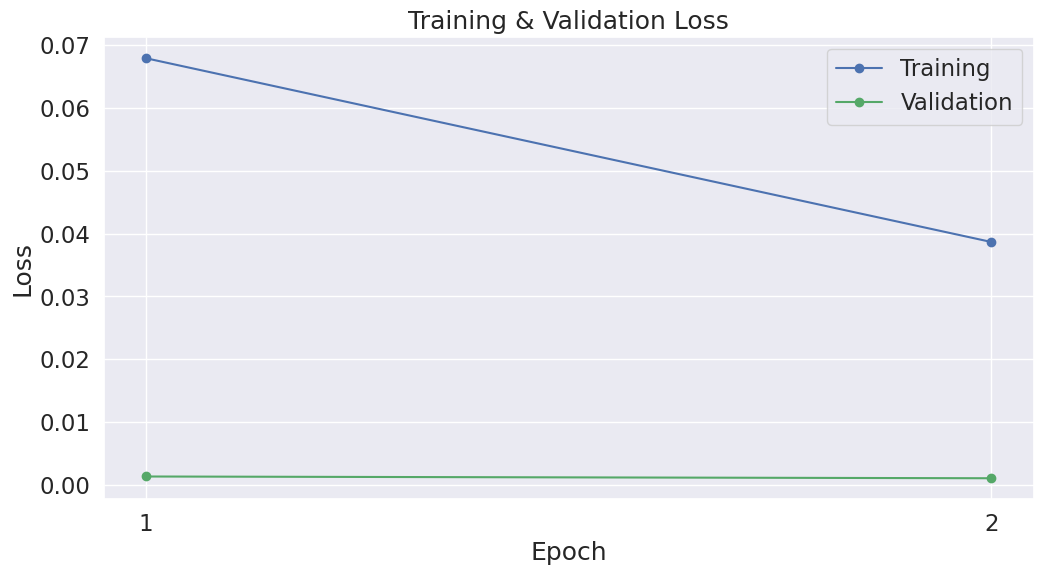

In [ ]:
import matplotlib.pyplot as plt


import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2])

plt.show()

In [ ]:
example = test_df['Tidy_body'][2374]
example

'note this is symfony  26 but i believe the same overall issue applies regardless of versionto start consider this form type that is designed to represent oneormore entities as a hidden field namespace stuff omitted for brevityclass hiddenentitytype extends abstracttype          var entitymanager         protected em    public function __constructentitymanager em            thisem  em        public function buildformformbuilderinterface builder array options            if optionsmultiple             builderaddviewtransformer                new entitiestoprimarykeystransformer                    thisemgetrepositoryoptionsclass                    optionsget_pk_callback                    optionsidentifier                                     else             builderaddviewtransformer                new entitytoprimarykeytransformer                    thisemgetrepositoryoptionsclass                    optionsget_pk_callback                                                  see class docbloc

In [ ]:
test_df

,Tidy_body,Tags,Binarized_Tags
0,im creating a simple rest application with dro...,[java],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,im using spring springdatajpa and find myself...,[java],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,i got one problem and i have described it belo...,"[ios, iphone, objective-c]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3,can any one tell me what is a the best way to ...,[java],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,why does the code below crash the net compiler...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
2372,filtering rows in a particular column are easy...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2373,im testing a method that manipulates a collect...,[c#],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2374,note this is symfony 26 but i believe the sam...,[php],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2375,i have the following example codeclass a p...,[c++],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [ ]:
# testing
#tokenize test
encodings = tokenizer.encode_plus(
    example,
    None,
    add_special_tokens=True,
    max_length=MAX_LEN,
    padding='max_length',
    return_token_type_ids=True,
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)
#before predicting we should set eval model
model.eval()
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device, dtype=torch.long)
    attention_mask = encodings['attention_mask'].to(device, dtype=torch.long)
    token_type_ids = encodings['token_type_ids'].to(device, dtype=torch.long)
    output = model(input_ids, attention_mask, token_type_ids)
    # Now we have 768 outputs, sigmoid
    final_output = torch.sigmoid(output).cpu().detach().numpy().tolist()
    print (final_output)
    print(mlb.classes_[np.argmax(final_output, axis=1)])


[[0.17071707546710968, 0.19788900017738342, 0.21107731759548187, 0.15182703733444214, 0.16406583786010742, 0.2088538408279419, 0.1630168855190277, 0.17239728569984436, 0.20080435276031494, 0.18382464349269867, 0.1743704080581665, 0.15247520804405212, 0.20041188597679138, 0.2146158218383789, 0.22487105429172516, 0.21170394122600555, 0.1931118667125702, 0.14756499230861664, 0.16436760127544403, 0.13168522715568542, 0.18709668517112732, 0.16109640896320343, 0.21007110178470612, 0.16722731292247772, 0.18607808649539948, 0.24415501952171326, 0.1626816987991333, 0.18970374763011932, 0.21194742619991302, 0.1679966300725937]]
['ruby']


In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from gensim.models import KeyedVectors

# # Load the pre-trained word2vec model
# model = KeyedVectors.load_word2vec_format(data_location + "GoogleNews-vectors-negative300.bin.gz", binary=True)

# # Normalize the data
# tag_vectors_scaled = StandardScaler().fit_transform(tag_vectors)

# # apply DBSCAN to cluster the vectors
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# clusters = dbscan.fit_predict(tag_vectors_scaled)

# # assign each tag to its corresponding cluster
# df["Cluster"] = np.where(np.array(clusters) == -1, "Noise", clusters)

# # print the number of clusters and their sizes
# print("Number of clusters:", len(np.unique(clusters))-1) # exclude the noise cluster
# print("Cluster sizes:", df.groupby("Cluster").size())

# unique_tags = tags_df["Tag"].unique()
# tag_vectors = []
# for tag in unique_tags:
#     try:
#         tag_vec = model[tag]
#         tag_vectors.append(tag_vec)
#     except KeyError:
#         # handle tags that are not in the vocabulary of the model
#         print(tag)
#         pass

# df = pd.DataFrame(data = {'tags': unique_tags, 'word2vec presentation': tag_vectors})